<a href="https://colab.research.google.com/github/Rahul1498/Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression
Introduction:

In this case study, we aim to predict the resale price of cars based on various features using the Linear Regression model. The data set consists of information about different cars, including attributes such as selling price, year, kilometers driven, engine capacity, max power, make, model, transmission type, and various other features.

Objective:

The primary objective is to build a predictive model that can accurately estimate the resale price of a car based on its characteristics. This model can be valuable for both buyers and sellers in the used car market, providing insights into the factors influencing resale prices.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/CarPred.csv')

In [3]:
df.head()

,make,transmission_type,seats_cop,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_patrol,seller_dealer,seller_self,year,km_driven,engine,max_power,model,selling_price
0,hyundai,0,0,0,1,0,0,1,0,0,0,1,2009,42945,2492,287,verna,210447.937555
1,toyota,0,0,0,1,0,0,0,0,1,1,0,2003,176401,3240,88,corolla,272870.715932
2,ford,1,0,0,0,0,0,0,0,1,1,1,2018,46852,3250,169,aspire,251387.190744
3,honda,1,0,0,0,0,1,0,0,0,1,1,2014,162580,1317,99,jazz,139196.325731
4,hyundai,1,0,0,1,0,1,0,0,0,1,1,2004,11264,3268,196,i10,227022.794299


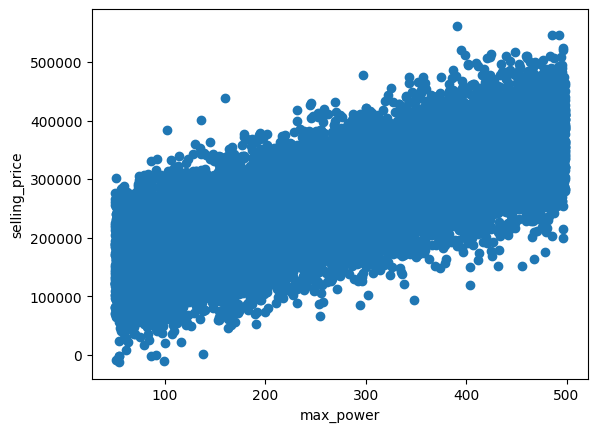

In [4]:
x = df["max_power"].values
y = df["selling_price"].values

plt.scatter(x, y)
plt.xlabel("max_power")
plt.ylabel("selling_price")
plt.show()

In [5]:
X = df[['year', 'km_driven', 'engine', 'max_power', 'transmission_type', 'seats_cop', 'seats_family', 'seats_large', 'fuel_cng', 'fuel_diesel', 'fuel_electric', 'fuel_patrol', 'fuel_lpg', 'fuel_electric', 'seller_dealer', 'seller_self']]
y = df['selling_price']

In [6]:
import statsmodels.api as sm
# Add a constant term for intercept
X_with_const = sm.add_constant(X)
# Fit linear regression model
model = sm.OLS(y, X_with_const).fit()


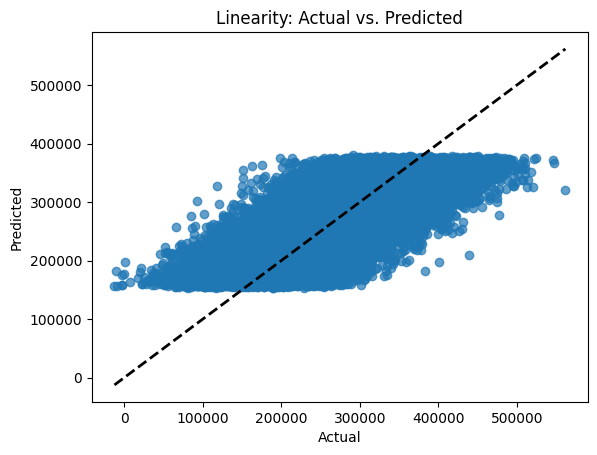

In [7]:
# Check linearity assumption by plotting actual vs. predicted values
plt.scatter(y, model.predict(), alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linearity: Actual vs. Predicted')
plt.show()

# New Section

In [8]:
residuals = model.resid


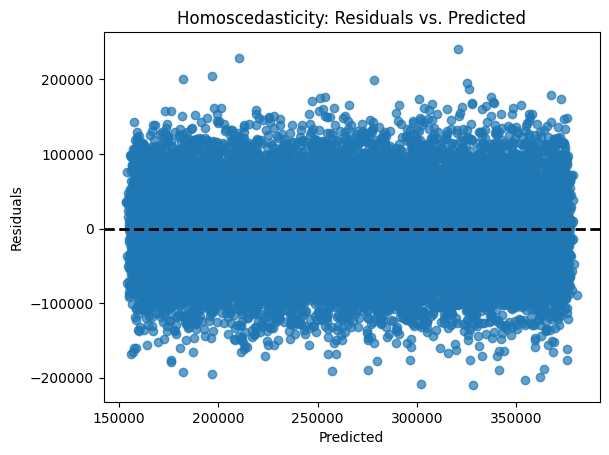

In [9]:
plt.scatter(model.predict(), residuals, alpha=0.7)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Homoscedasticity: Residuals vs. Predicted')
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.show()


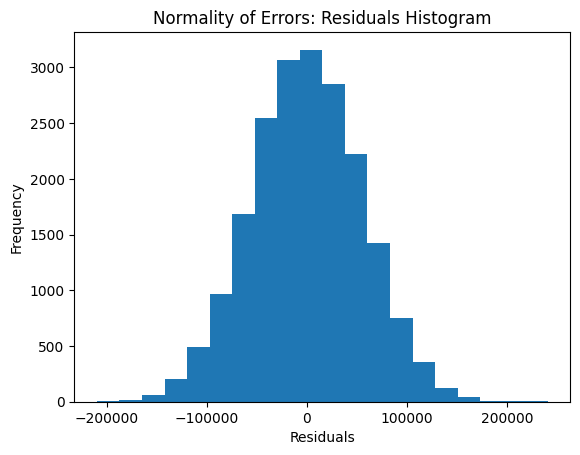

In [10]:
# Check normality of errors by plotting a histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality of Errors: Residuals Histogram')
plt.show()

In [11]:
# Check independence of errors using Durbin-Watson test (DW statistic)
durbin_watson = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson statistic:", durbin_watson)

Durbin-Watson statistic: 2.01352969275313


In [12]:
# Check for multicollinearity using variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X_with_const.copy()
vif_data = vif_data.drop(columns='const')  # Exclude the constant term
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

print(vif)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             Variable        VIF
0                year  56.648571
1           km_driven   4.007914
2              engine   7.729838
3           max_power   5.478773
4   transmission_type   1.998263
5           seats_cop   2.010321
6        seats_family   3.019145
7         seats_large   5.036540
8            fuel_cng   1.994996
9         fuel_diesel   3.047902
10      fuel_electric        inf
11        fuel_patrol  17.090605
12           fuel_lpg   9.085081
13      fuel_electric        inf
14      seller_dealer   1.995045
15        seller_self   1.977211


In [13]:
# We are defining a function called univariate_linear_hypothesis.
# This function takes an input vector x and a list theta containing two values (Theta 0 and Theta 1).
# It calculates the predicted value (Y hat) using the univariate linear hypothesis equation: Y hat = Theta 0 + Theta 1 * x.

def univariate_linear_hypothesis(x, theta):
  y_hat = theta[0] + theta[1]*x
  return y_hat

In [14]:
# We need to define our cost function, and in this case, we are using the mean squared error as the cost function.
# The cost function takes input vectors X and Y, and a list theta containing two values (Theta 0 and Theta 1).
# It computes the predicted values (Y hat) using the univariate linear hypothesis and calculates the mean squared error.

def cost(X, Y , theta):
  m = X.shape[0] #number of training examples
  total_error = 0.0
  # Calculate the total error by summing up squared differences for each observation
  for i in range(m):
      y_hat = univariate_linear_hypothesis(X[i], theta)  # Compute Y hat using the linear hypothesis
      total_error += (y_hat - Y[i])**2  # Square of the difference (residual) for each observation

  # Calculate and return the mean squared error
  return total_error / m


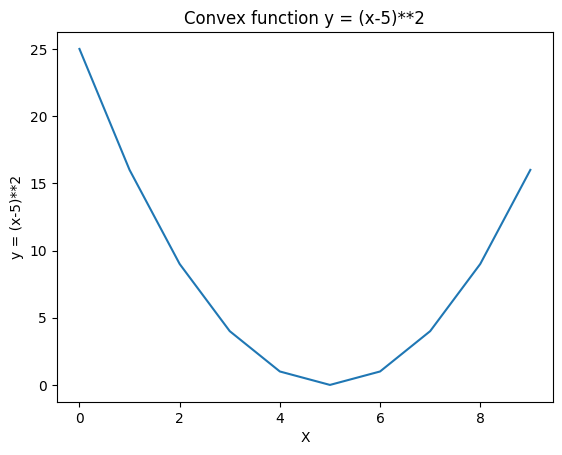

In [16]:
# We are creating a simple convex function y = (x-5)^2.
# Our goal is to visualize this function and demonstrate how the gradient descent approach works.

# Create some random data for X values
X = np.arange(10)

# Define the convex function y = (x-5)**2
Y = (X-5)**2  # X = 5, cost function will give minimum (0)

# Plot the convex function
# plt.style.use("seaborn") # Removed this line
plt.plot(X, Y)
plt.xlabel("X")
plt.ylabel("y = (x-5)**2")
plt.title("Convex function y = (x-5)**2")
plt.show()

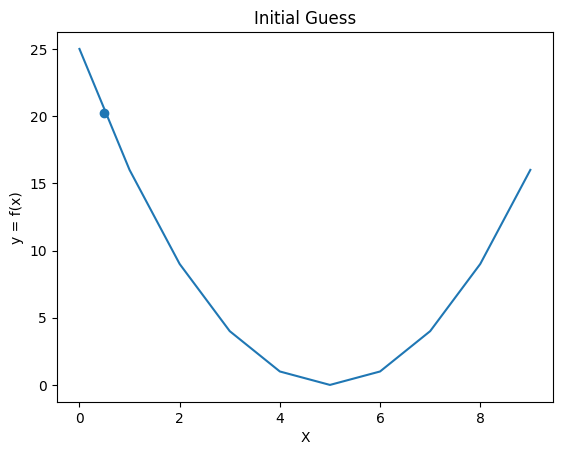

In [17]:
x = 0.5

y = (x-5)**2
plt.plot(X,Y)

plt.scatter(x,y)

plt.xlabel("X")
plt.ylabel("y = f(x)")
plt.title("Initial Guess")
plt.show()

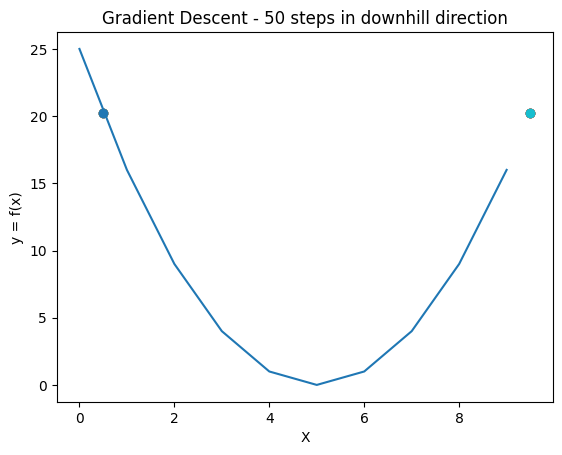

In [18]:
# In this we are initializing x to 0.5, representing the starting point on the cost function.
# It iterates 10 times, updating x directly using the gradient of the cost function (grad = 2 * (x - 5)).
# The code plots the cost function and the points where each update occurs.

import time

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

x = 0.5

y = (x-5)**2
plt.plot(X,Y)
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("y = f(x)")
plt.title("Gradient Descent - 50 steps in downhill direction")
# plt.show()

lr = 0.1 # not using learning rate in this part -> this is without learning rate gradient
errors = []

for i in range(10):
  grad = 2*(x-5)
  x = x- grad
  y = (x-5)**2
  error = y - 0
  errors.append(error)
  plt.scatter(x, y)
  fig.canvas.draw()
  time.sleep(0.5)
plt.show()

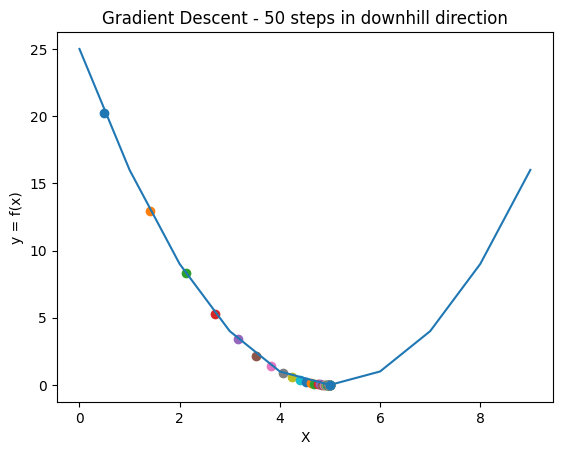

In [19]:
# Similar to the above code, we are initializing x to 0.5.
# It iterates 50 times, but this time updates x using the learning rate (lr) multiplied by the gradient (grad).
# The learning rate controls the step size in the downhill direction.

import time

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

x = 0.5

y = (x-5)**2
plt.plot(X,Y)
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("y = f(x)")
plt.title("Gradient Descent - 50 steps in downhill direction")
# plt.show()

lr = 0.1
errors = []

for i in range(50):
  grad = 2*(x-5)
  x = x- lr*grad
  y = (x-5)**2
  error = y - 0
  errors.append(error)
  plt.scatter(x, y)
  fig.canvas.draw()
  time.sleep(0.5)
plt.show()

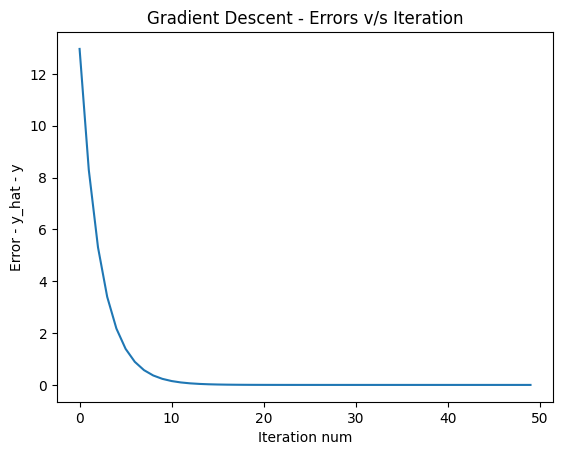

In [20]:
plt.plot(errors)
plt.xlabel("Iteration num")
plt.ylabel("Error - y_hat - y")
plt.title("Gradient Descent - Errors v/s Iteration")
plt.show()

In [21]:
X = df["max_power"]
Y = df["selling_price"]

# Normalisation -> standard Normalisation
u = X.mean()
std = X.std()

X = (X-u)/std

In [22]:
def hypothesis(x, theta):
    # Linear hypothesis function: h(x) = theta[0] + theta[1]*x
    y_hat = theta[0] + theta[1]*x
    return y_hat

In [23]:
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))  # Initializing gradient vector with zeros for Theta 0 and Theta 1

    for i in range(m):
        x = X[i]  # Current input
        y_hat = hypothesis(x, theta)  # Computing hypothesis for the current input
        y = Y[i]  # Actual output

        # Updating gradients for Theta 0 and Theta 1
        grad[0] += (y_hat - y)  # Partial derivative of cost with respect to Theta 0
        grad[1] += (y_hat - y)*x  # Partial derivative of cost with respect to Theta 1

    return grad/m  # Average gradient over all examples

In [24]:
def error(X, Y, theta):
    m = X.shape[0]  # Number of examples in the dataset
    total_error = 0.0  # Initialize the total error

    for i in range(m):
        x = X[i]  # Current input
        y_hat = hypothesis(x, theta)  # Compute hypothesis for the current input
        y = Y[i]  # Actual output

        # Compute the squared error for the current example
        error_i = (y_hat - y)**2
        total_error += error_i  # Accumulate the squared error

    return (total_error/m)  # Return the mean squared error

In [25]:
def gradient_descent(X, Y, max_steps=100, learning_rate=0.1):
    theta = np.zeros((2,))  # Initialize weights Theta 0 and Theta 1 to zero
    error_list = []  # List to store errors during iterations
    theta_list = []  # List to store Theta values during updates

    for i in range(max_steps):
        # Compute gradient using the gradient function
        grad = gradient(X, Y, theta)

        # Compute error using the error function
        e = error(X, Y, theta)

        # Update weights Theta 0 and Theta 1 using the learning rate and gradients
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

        # Store the updated Theta values during each iteration
        theta_list.append((theta[0], theta[1]))
        # Store the error during each iteration
        error_list.append(e)

    return theta, error_list, theta_list

[264899.50073976  63179.87873954]


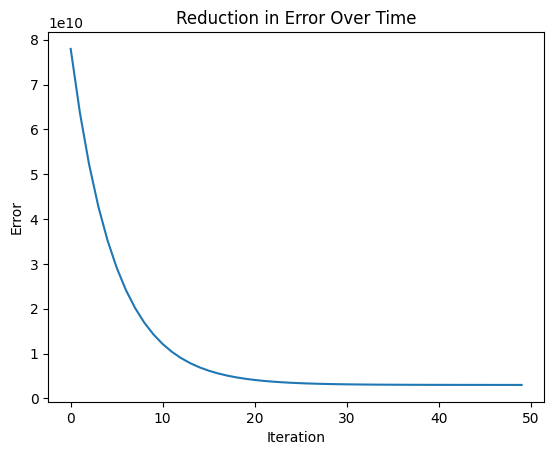

In [29]:
theta, error_list, theta_list = gradient_descent(X, Y, max_steps=50)
print(theta)

# Initialize a new figure for the plot
fig = plt.figure()

# Plot the error values over iterations
plt.plot(error_list)

# Set the title and axis labels for better interpretation
plt.title('Reduction in Error Over Time')
plt.xlabel('Iteration')
plt.ylabel('Error')

# Display the plot
plt.show()

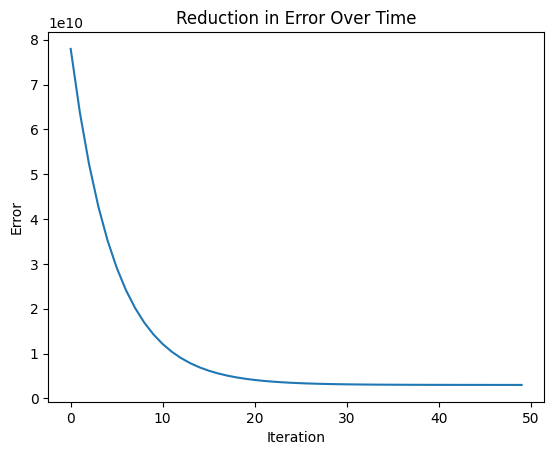

In [30]:
# Initialize a new figure for the plot
fig = plt.figure()

# Plot the error values over iterations
plt.plot(error_list)

# Set the title and axis labels for better interpretation
plt.title('Reduction in Error Over Time')
plt.xlabel('Iteration')
plt.ylabel('Error')

# Display the plot
plt.show()

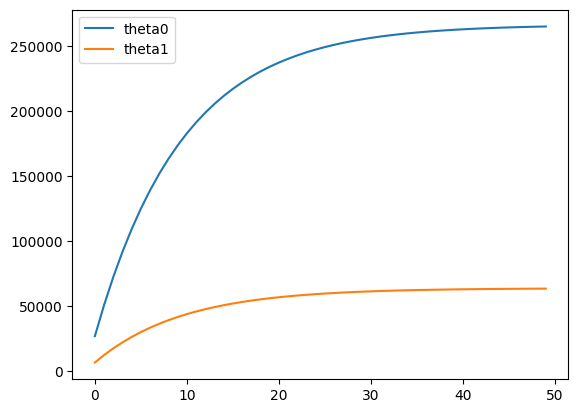

In [31]:
# Initialize a new figure for the plot
fig = plt.figure()

# Extract Theta 0 and Theta 1 values from the 'theta_list'
theta_list = np.array(theta_list)

# Plot the changes in Theta 0 and Theta 1 over iterations
plt.plot(theta_list[:, 0], label="theta0")
plt.plot(theta_list[:, 1], label="theta1")

# Add a legend for better interpretation
plt.legend()

# Display the plot
plt.show()

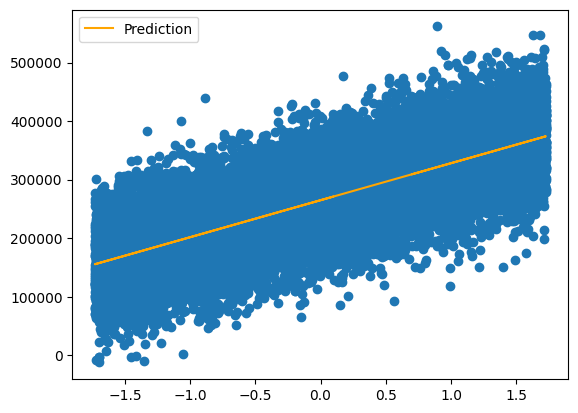

In [32]:
# Initialize a new figure for the plot
fig = plt.figure()

# Compute predicted values using the trained model parameters
Y_hat = hypothesis(X, theta)

# Scatter plot of the original data points
plt.scatter(X, Y)

# Plot the regression line representing the model's predictions in orange
plt.plot(X, Y_hat, color='orange', label='Prediction')

# Add a legend for better interpretation
plt.legend()

# Display the plot
plt.show()

In [33]:
import numpy as np

def r2_score(Y, Y_hat):
    # Calculate the sum of squared differences between actual and predicted values
    num = np.sum((Y - Y_hat)**2)

    # Calculate the sum of squared differences between actual values and their mean
    denom = np.sum((Y - np.mean(Y))**2)

    # Compute the R-squared score
    score = 1 - num / denom

    return score

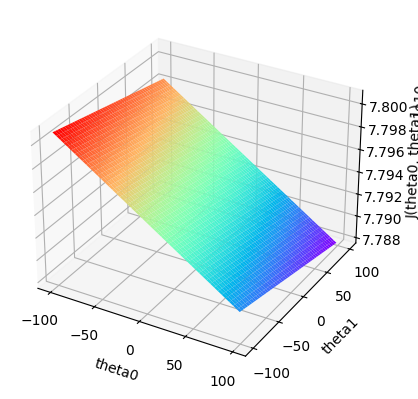

In [34]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a range of values for Theta 0 and Theta 1
T0 = np.arange(-100, 100, 1)
T1 = np.arange(-100, 100, 1)

# Create a meshgrid of Theta 0 and Theta 1 values
T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)

# Calculate the cost (J) for each combination of Theta 0 and Theta 1
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        Y_hat = T1[i, j] * X + T0[i, j]
        J[i, j] = np.sum(((Y - Y_hat) ** 2) / Y.shape[0])

# Create a 3D plot of the cost function
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')

# Label the axes for better interpretation
axes.set_xlabel("theta0")
axes.set_ylabel("theta1")
axes.set_zlabel("J(theta0, theta1)")

# Display the 3D plot
plt.show()

In [35]:
# The linear_model module in Scikit-Learn provides an implementation of linear regression.
from sklearn.linear_model import LinearRegression
# Creating an instance of the linear regression model.
model = LinearRegression()

In [37]:
import pandas as pd

# Assuming X and Y are Pandas Series
X = pd.Series(X) # Changed from X.flatten() to X
Y = pd.Series(Y) # Changed from Y.flatten() to Y

# Convert to NumPy array and reshape
X = X.values.reshape(X.size, 1)
Y = Y.values.reshape(Y.size, 1)

In [38]:
print(X.shape)
print(Y.shape)

(20000, 1)
(20000, 1)


In [40]:
model.fit(X, Y)
model.intercept_
model.coef_
model.score(X,Y)
output = model.predict(X)

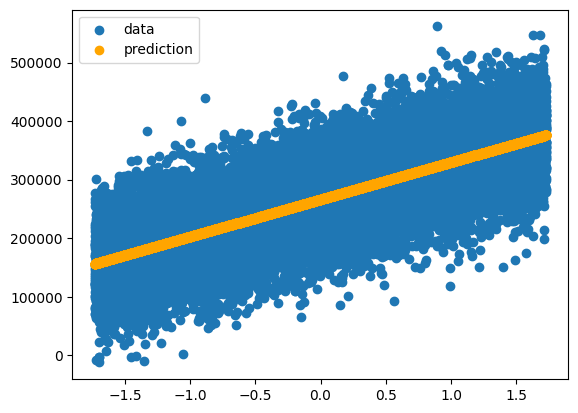

In [41]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Initialize a new figure for the plot
fig = plt.figure()

# Scatter plot of the original data points in blue
plt.scatter(X, Y, label='data')

# Scatter plot of the model predictions in orange
plt.scatter(X, output, color='orange', label='prediction')

# Add a legend for better interpretation
plt.legend()

# Display the plot
plt.show()